In [ ]:
import pandas as pd
import os


file_path = "/content/second"

# Check if the file exists before processing
if os.path.exists(file_path):
    try:
        df = pd.read_table(file_path, sep='\t', dtype=str)  # Read file as tab-separated values
        csv_file = file_path + ".csv"  # Append .csv to filename
        df.to_csv(csv_file, index=False, encoding='utf-8-sig')  # Convert and save as CSV
        print(f"Conversion successful: {csv_file}")
    except Exception as e:
        print(f"Error processing file: {e}")
else:
    print(f"File '{file_path}' not found. Make sure it's in the Colab directory.")



Conversion successful: /content/second.csv


In [ ]:
import pandas as pd
df= pd.read_csv("/content/second.csv")
print(df.head())

   block_id                                               hash  \
0    884251  1fc3fdd4dd8321f19f438efc07d33f560652bc5b8c9a58...   
1    884251  ccf8e94e7b9a2a11ce8b0a83418e8e73fe7a926cf89cea...   
2    884251  a207ad54b004008f175aab8660f73d9dd1c02db19721d9...   
3    884251  7d817523929ad0d822a37c1c54ca0b011ad06790e7d221...   
4    884251  09f3f3d3a69091c38595ef3badf7065b906c3de46c0349...   

                  time  size  weight  version  lock_time  is_coinbase  \
0  2025-02-18 00:07:27   192     660        1          0            1   
1  2025-02-18 00:07:27   222     561        1          0            0   
2  2025-02-18 00:07:27   222     888        1          0            0   
3  2025-02-18 00:07:27   218     542        1          0            0   
4  2025-02-18 00:07:27   847    1864        1          0            0   

   has_witness  input_count  ...  input_total_usd  output_total  \
0            1            1  ...           0.0000     315275782   
1            1            1  .

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("second.csv")
df = df.drop(index=0)

columns_to_drop=[ "hash", "input_total_usd", "output_total_usd","fee_per_kb_usd","fee_usd","block_id","fee_per_kwu_usd","cdd_total","version","has_witness","lock_time","is_coinbase","input_total","output_total","time","fee_per_kwu"]
df = df.drop(columns=columns_to_drop)
df.to_csv("new_transaction_data.csv", index=False)


print(df.head())
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


   size  weight  input_count  output_count     fee  fee_per_kb
1   222     561            1             2  109557  493500.000
2   222     888            1             2   35000  157657.660
3   218     542            1             1   17136   78605.510
4   847    1864            2             7   46800   55253.836
5   771    2319            2             4   40680   52762.645
                  size    weight  input_count  output_count       fee  \
size          1.000000  0.961114     0.799867      0.076131  0.392172   
weight        0.961114  1.000000     0.912425      0.162220  0.439404   
input_count   0.799867  0.912425     1.000000      0.001196  0.371954   
output_count  0.076131  0.162220     0.001196      1.000000  0.174235   
fee           0.392172  0.439404     0.371954      0.174235  1.000000   
fee_per_kb   -0.013699 -0.013221    -0.013213     -0.002170  0.242312   

              fee_per_kb  
size           -0.013699  
weight         -0.013221  
input_count    -0.013213  
ou

In [ ]:
import pandas as pd

# Define the file paths for both CSVs
csv_file1 = "/content/new_transaction_data.csv"  # Update with actual file name
csv_file2 = "transaction_data.csv"

# Read both CSV files
df1 = pd.read_csv(csv_file1)
df2 = pd.read_csv(csv_file2)

# Concatenate the DataFrames
merged_df = pd.concat([df1, df2], ignore_index=True)


merged_csv = "/content/final_data_transactions.csv"
merged_df.to_csv(merged_csv, index=False, encoding='utf-8-sig')

print(f"Merging successful! Merged file saved as: {merged_csv}")


Merging successful! Merged file saved as: /content/final_data_transactions.csv


In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/content/final_data_transactions.csv")

# Print total number of rows
print("Total rows:", len(df))

# Check for NaN values in each column
print("\nMissing values per column:")
print(df.isna().sum())

# If you want to see only columns with missing values:
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_values)


Total rows: 903172

Missing values per column:
size            0
weight          0
input_count     0
output_count    0
fee             0
fee_per_kb      0
dtype: int64

Columns with missing values:
Series([], dtype: int64)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("final_data_transactions.csv")



correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                  size    weight  input_count  output_count       fee  \
size          1.000000  0.929083     0.764554      0.201941  0.328251   
weight        0.929083  1.000000     0.836428      0.383669  0.373495   
input_count   0.764554  0.836428     1.000000      0.010680  0.319447   
output_count  0.201941  0.383669     0.010680      1.000000  0.137884   
fee           0.328251  0.373495     0.319447      0.137884  1.000000   
fee_per_kb   -0.004656 -0.001254    -0.003140      0.002799  0.267223   

              fee_per_kb  
size           -0.004656  
weight         -0.001254  
input_count    -0.003140  
output_count    0.002799  
fee             0.267223  
fee_per_kb      1.000000  


In [ ]:
import pandas as pd
df=pd.read_csv("transaction_data.csv")

print(df.head())
print(len(df))

   size  weight  input_count  output_count      fee  fee_per_kb
0   382     766            1             2    60000  157068.060
1  7443   13716           50             1  1032600  138734.380
2  1274    2054            4             2    77550   60871.273
3   380     755            1             2    28400   74736.840
4   190     760            1             1    25785  135710.530
480464


In [ ]:
df_info = df.info()
df_head = df.head()
df_summary = df.describe()
print(len(df))
df_info, df_head, df_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480464 entries, 0 to 480463
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   size          480464 non-null  int64  
 1   weight        480464 non-null  int64  
 2   input_count   480464 non-null  int64  
 3   output_count  480464 non-null  int64  
 4   fee           480464 non-null  int64  
 5   fee_per_kb    480464 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 22.0 MB
480464


(None,
    size  weight  input_count  output_count      fee  fee_per_kb
 0   382     766            1             2    60000  157068.060
 1  7443   13716           50             1  1032600  138734.380
 2  1274    2054            4             2    77550   60871.273
 3   380     755            1             2    28400   74736.840
 4   190     760            1             1    25785  135710.530,
                 size         weight    input_count   output_count  \
 count  480464.000000  480464.000000  480464.000000  480464.000000   
 mean      458.457285    1080.647659       1.900567       2.680842   
 std      2506.728497    5196.260624      12.129874      17.372727   
 min       150.000000     396.000000       1.000000       1.000000   
 25%       223.000000     561.000000       1.000000       1.000000   
 50%       308.000000     602.000000       1.000000       2.000000   
 75%       363.000000     822.000000       1.000000       2.000000   
 max    399091.000000  399625.000000    14

In [ ]:
skewness = df.skew()

# Print the skewness for each column
print("Skewness of each feature:")
print(skewness)

Skewness of each feature:
size             66.871547
weight           34.084471
input_count      46.563490
output_count     52.077535
fee             102.348716
fee_per_kb       40.244855
dtype: float64


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12012/12012 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.8257 - mae: 0.2091 - val_loss: 3.2218e-04 - val_mae: 0.0128
Epoch 2/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - loss: 0.0020 - mae: 0.0192 - val_loss: 8.8450e-05 - val_mae: 0.0053
Epoch 3/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 5.1808e-04 - mae: 0.0122 - val_loss: 2.6913e-05 - val_mae: 0.0032
Epoch 4/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 2.6930e-04 - mae: 0.0084 - val_loss: 1.6705e-05 - val_mae: 0.0025
Epoch 5/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 2.2964e-04 - mae: 0.0080 - val_loss: 6.2049e-05 - val_mae: 0.0071
Epoch 6/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 1.6871e-04 - mae: 0.0071 - val_loss: 9.0103e-05 - val_mae: 0.0089
Epoch 7/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 1.5815e-04 - mae: 0.0065 - val_loss: 9.0822e-05 - val_mae: 0.0082
Epoch 8/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1.0007e-04 - mae: 0.0059 - val_loss: 

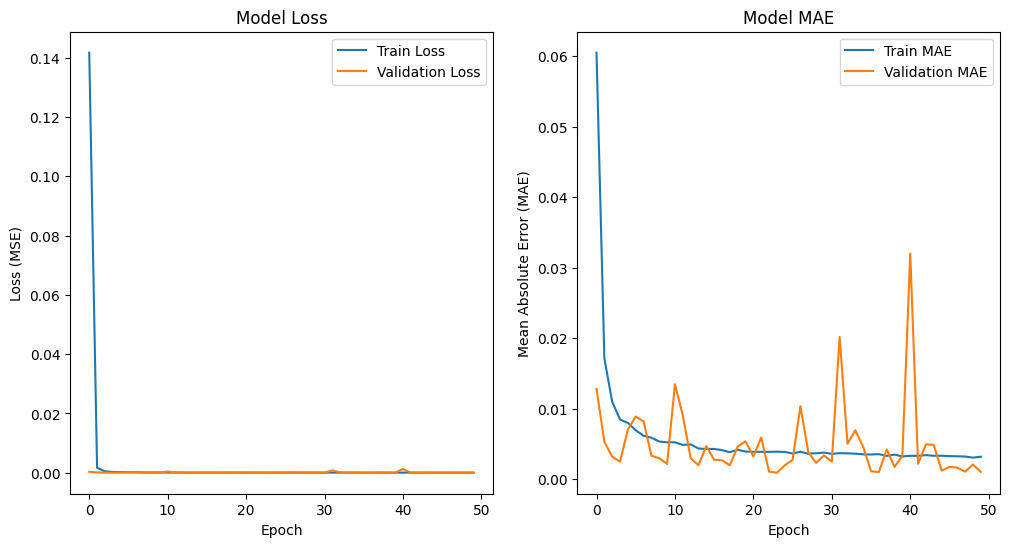

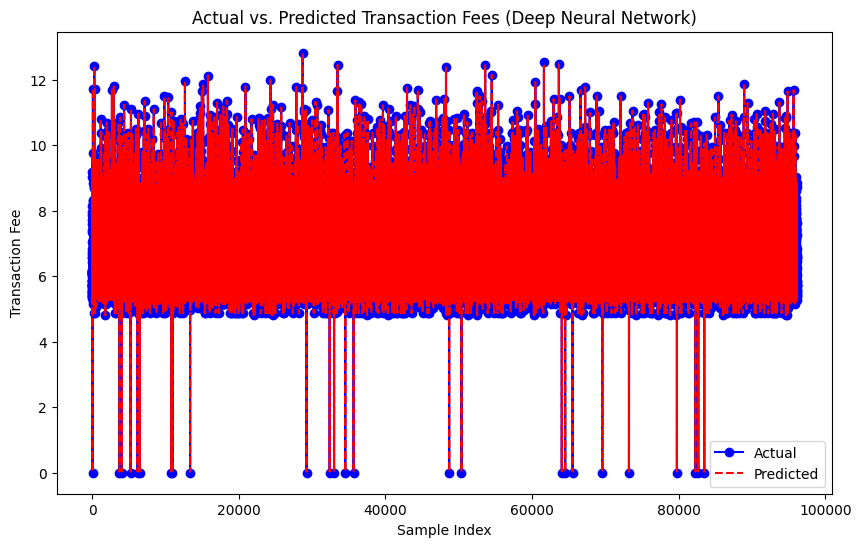

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Log-transform highly skewed features
df['log_size'] = np.log(df['size'] + 1)
df['log_fee'] = np.log(df['fee'] + 1)
df['log_input_count'] = np.log(df['input_count'] + 1)
df['log_output_count'] = np.log(df['output_count'] + 1)
df['fee_per_kb']=np.log(df['fee_per_kb']+1)
df['log_weight'] = np.log(df['weight'] + 1)

# Define features (X) and target (y)
X = df[['log_size', 'log_weight', 'log_input_count','log_output_count','fee_per_kb']]
y = np.log(df['fee'] + 1)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Deep Neural Network (DNN) model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Additional hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Output layer for regression (no activation function)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50,batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test_scaled, y_test)

# Print evaluation metrics
print("Test Loss (MSE):", loss)
print("Test MAE:", mae)

# Make predictions on the test set
y_pred_dnn = model.predict(X_test_scaled)

# Evaluate the model with Mean Squared Error and R^2 Score
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)

# Print MSE and R^2
print("Mean Squared Error (MSE):", mse_dnn)
print("R^2 Score:", r2_dnn)

# Plot training history (Loss and MAE)
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.show()

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual", color='blue', marker='o')
plt.plot(y_pred_dnn, label="Predicted", color='red', linestyle='dashed')
plt.legend()
plt.title("Actual vs. Predicted Transaction Fees (Deep Neural Network)")
plt.xlabel("Sample Index")
plt.ylabel("Transaction Fee")
plt.show()


3003/3003 ━━━━━━━━━━━━━━━━━━━━ 3s 992us/step
Mean Squared Error (MSE) on actual values: 10328.315961248505
R^2 Score on actual values: 0.99950199744367


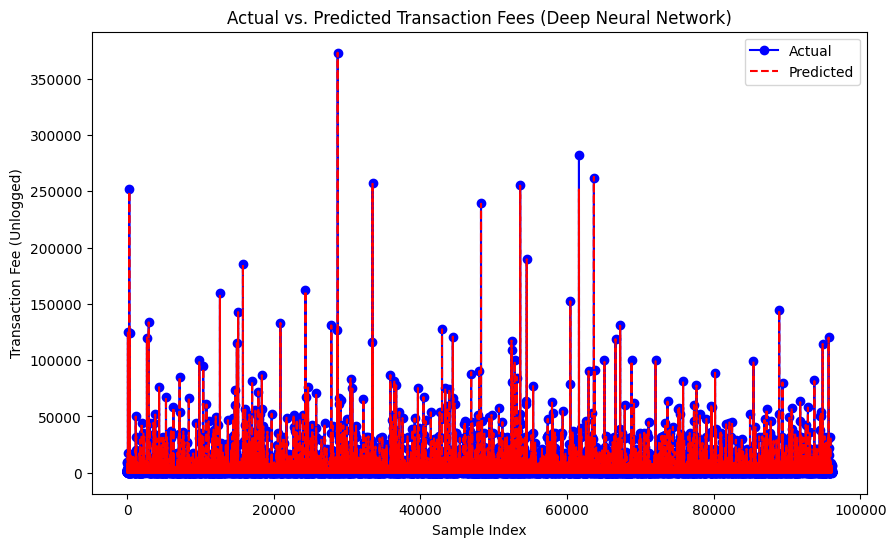

In [ ]:
# Make predictions on the test set
y_pred_dnn_log = model.predict(X_test_scaled)

# Exponentiate the predicted log values to get actual transaction fees
y_pred_dnn = np.exp(y_pred_dnn_log)

# Exponentiate the true log-transformed values to get actual transaction fees
y_test_actual = np.exp(y_test)

# Evaluate the model with Mean Squared Error and R^2 Score on the actual scale
mse_dnn = mean_squared_error(y_test_actual, y_pred_dnn)
r2_dnn = r2_score(y_test_actual, y_pred_dnn)

# Print MSE and R^2 on the actual scale
print("Mean Squared Error (MSE) on actual values:", mse_dnn)
print("R^2 Score on actual values:", r2_dnn)

# Plot Predicted vs Actual (unlogged values)
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual.values, label="Actual", color='blue', marker='o')
plt.plot(y_pred_dnn, label="Predicted", color='red', linestyle='dashed')
plt.legend()
plt.title("Actual vs. Predicted Transaction Fees (Deep Neural Network)")
plt.xlabel("Sample Index")
plt.ylabel("Transaction Fee (Unlogged)")
plt.show()


In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test_actual.values,
    'Predicted': y_pred_dnn.flatten() # Use .flatten() to convert to 1D array if necessary
})
print(results_df)


       Actual    Predicted
0       229.0   229.231735
1       427.0   427.598053
2       249.0   249.053970
3       441.0   441.353699
4       301.0   301.328888
...       ...          ...
96088   735.0   734.658142
96089  2058.0  2050.439941
96090   334.0   334.742676
96091   194.0   194.137955
96092   237.0   237.202927

[96093 rows x 2 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


model.save('/content/drive/My Drive/transaction_model.keras')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Mount Google Drive
drive.mount('/content/drive')

# Load the saved model
model_path = "/content/drive/My Drive/transaction_model.keras"
model = load_model(model_path)
print("Model Loaded Successfully!")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load new data
new_data = pd.read_csv("transaction_data.csv")

# Apply log transformations (same as training)
new_data['log_size'] = np.log(new_data['size'] + 1)
new_data['log_weight'] = np.log(new_data['weight'] + 1)
new_data['log_input_count'] = np.log(new_data['input_count'] + 1)
new_data['log_output_count'] = np.log(new_data['output_count'] + 1)
new_data['log_fee_per_kb'] = np.log(new_data['fee_per_kb'] + 1)

# Select the same features used during training
X_new = new_data[['log_size', 'log_weight', 'log_input_count', 'log_output_count', 'log_fee_per_kb']]

# Load the scaler used during training (assuming you saved it)
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Use transform() if you saved the original scaler

# Predict transaction fees (in log scale)
y_pred_log = model.predict(X_new_scaled)

# Convert log-transformed predictions back to actual values
y_pred = np.exp(y_pred_log)

# Assuming that 'actual_fee' is available in the new data (make sure it's present in the CSV file)
if 'actual_fee' in new_data.columns:
    # Add predictions and actual fees to the dataframe
    new_data['Predicted_Fee'] = y_pred
    print(new_data[['size', 'weight', 'input_count', 'output_count', 'fee_per_kb', 'actual_fee', 'Predicted_Fee']].head())
else:
    # If actual fees are not available, just display the predicted fees
    new_data['Predicted_Fee'] = y_pred
    print(new_data[['size', 'weight', 'input_count', 'output_count', 'fee_per_kb', 'Predicted_Fee']].head())


3815/3815 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
   size  weight  input_count  output_count  fee_per_kb  Predicted_Fee
0   382     766            1             2  157068.060   7.011829e+04
1  7443   13716           50             1  138734.380   1.167786e+06
2  1274    2054            4             2   60871.273   8.919920e+04
3   380     755            1             2   74736.840   3.313123e+04
4   190     760            1             1  135710.530   3.036176e+04


Scaler saved at: /content/drive/MyDrive/scaler123.pkl
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12012/12012 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 0.6459 - mae: 0.2023 - val_loss: 1.8104e-04 - val_mae: 0.0098
Epoch 2/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 7.1588e-04 - mae: 0.0134 - val_loss: 1.5579e-04 - val_mae: 0.0112
Epoch 3/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 2.1731e-04 - mae: 0.0062 - val_loss: 2.5736e-06 - val_mae: 0.0014
Epoch 4/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 1.1519e-04 - mae: 0.0054 - val_loss: 5.3876e-05 - val_mae: 0.0051
Epoch 5/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 7.8506e-05 - mae: 0.0040 - val_loss: 3.1216e-06 - val_mae: 0.0017
Epoch 6/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 9.5341e-05 - mae: 0.0039 - val_loss: 1.3180e-05 - val_mae: 0.0017
Epoch 7/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 5.0717e-05 - mae: 0.0031 - val_loss: 7.9736e-06 - val_mae: 0.0022
Epoch 8/50
12012/12012 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 7.7687e-05 - mae: 0.0033 - val_lo

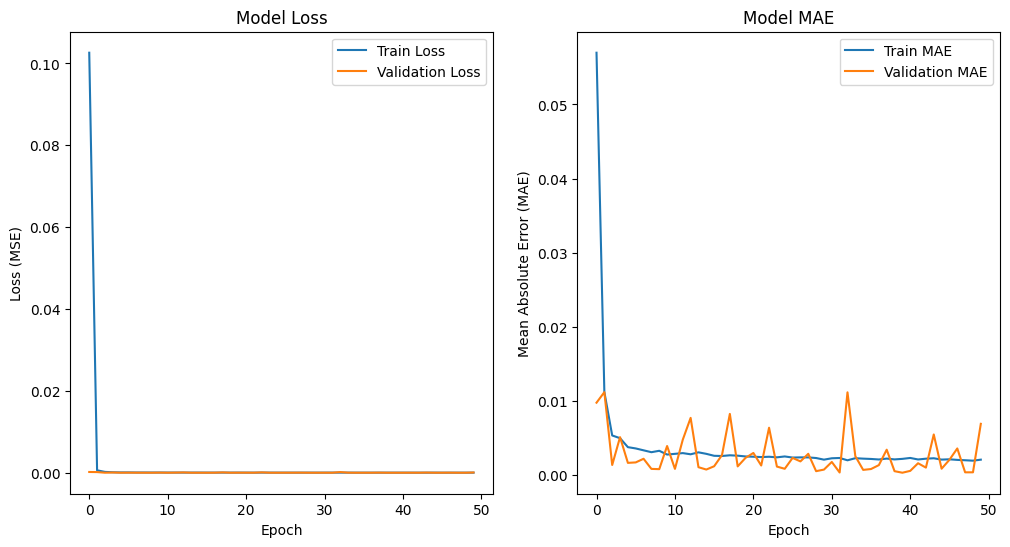

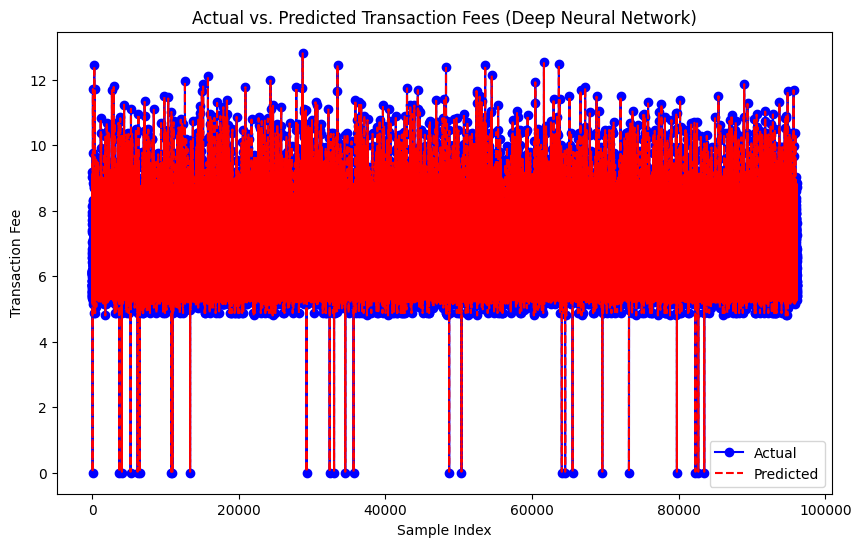

In [ ]:
import joblib
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df=pd.read_csv("transaction_data.csv")
# Log-transform highly skewed features
df['log_size'] = np.log(df['size'] + 1)
df['log_fee'] = np.log(df['fee'] + 1)
df['log_input_count'] = np.log(df['input_count'] + 1)
df['log_output_count'] = np.log(df['output_count'] + 1)
df['fee_per_kb']=np.log(df['fee_per_kb']+1)
df['log_weight'] = np.log(df['weight'] + 1)

# Define features (X) and target (y)
X = df[['log_size', 'log_weight', 'log_input_count','log_output_count','fee_per_kb']]
y = np.log(df['fee'] + 1)
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler_path = "/content/drive/MyDrive/scaler123.pkl"

# Save the scaler to Google Drive
joblib.dump(scaler, scaler_path)

print(f"Scaler saved at: {scaler_path}")

# Build the Deep Neural Network (DNN) model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Additional hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Output layer for regression (no activation function)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50,batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test data
loss, mae = model.evaluate(X_test_scaled, y_test)

# Print evaluation metrics
print("Test Loss (MSE):", loss)
print("Test MAE:", mae)

# Make predictions on the test set
y_pred_dnn = model.predict(X_test_scaled)

# Evaluate the model with Mean Squared Error and R^2 Score
mse_dnn = mean_squared_error(y_test, y_pred_dnn)
r2_dnn = r2_score(y_test, y_pred_dnn)

# Print MSE and R^2
print("Mean Squared Error (MSE):", mse_dnn)
print("R^2 Score:", r2_dnn)

# Plot training history (Loss and MAE)
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.show()

# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual", color='blue', marker='o')
plt.plot(y_pred_dnn, label="Predicted", color='red', linestyle='dashed')
plt.legend()
plt.title("Actual vs. Predicted Transaction Fees (Deep Neural Network)")
plt.xlabel("Sample Index")
plt.ylabel("Transaction Fee")
plt.show()

model.save('/content/drive/My Drive/new_transaction_model.keras')

In [ ]:
import joblib
import tensorflow as tf

# Load the scaler
scaler_path = "/content/drive/MyDrive/scaler123.pkl"
scaler = joblib.load(scaler_path)
print("Scaler loaded successfully!")

# Load the trained model
model_path = "/content/drive/MyDrive/new_transaction_model.keras"
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")


Scaler loaded successfully!
Model loaded successfully!


In [ ]:
import pandas as pd
import joblib
import tensorflow as tf
import numpy as np

# Load the scaler and model
scaler_path = "/content/drive/MyDrive/scaler123.pkl"
scaler = joblib.load(scaler_path)
print("Scaler loaded successfully!")

model_path = "/content/drive/MyDrive/new_transaction_model.keras"
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

# Load new transaction data
new_data_path = "new_transaction_data.csv"
new_data = pd.read_csv(new_data_path)

# Apply log transformation to relevant features
new_data['log_size'] = np.log(new_data['size'] + 1)
new_data['log_weight'] = np.log(new_data['weight'] + 1)
new_data['log_input_count'] = np.log(new_data['input_count'] + 1)
new_data['log_output_count'] = np.log(new_data['output_count'] + 1)
# Use the original column name 'fee_per_kb' instead of 'log_fee_per_kb'
new_data['fee_per_kb'] = np.log(new_data['fee_per_kb'] + 1)

# Display the columns after transformation
print("Columns in the new data after log transformation:")
print(new_data.columns)

# Define features (X) and actual target values (y)
# Ensure you use the correct feature names here as well
X_new = new_data[['log_size', 'log_weight', 'log_input_count', 'log_output_count', 'fee_per_kb']]
y_actual = new_data['fee']  # Ensure this is in the original (non-log) form

# Scale the features using the loaded scaler
X_scaled = scaler.transform(X_new)

# Predict using the model
y_pred_log = model.predict(X_scaled)

# Reverse the log1p transformation (used during training)
y_pred = np.expm1(y_pred_log.flatten())

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Actual Fee': y_actual,
    'Predicted Fee': y_pred
})

# Display comparison
print("\nComparison between Actual and Predicted Fees:")
print(comparison.head())

# Calculate and display fee saved
fee_saved = y_actual - y_pred
comparison['Fee Saved'] = fee_saved

print("\nFee saved per transaction:")
print(comparison[['Actual Fee', 'Predicted Fee', 'Fee Saved']].head(10))

Scaler loaded successfully!
Model loaded successfully!
Columns in the new data after log transformation:
Index(['size', 'weight', 'input_count', 'output_count', 'fee', 'fee_per_kb',
       'log_size', 'log_weight', 'log_input_count', 'log_output_count'],
      dtype='object')
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Comparison between Actual and Predicted Fees:
   Actual Fee  Predicted Fee
0      109557  106074.570312
1       35000   34059.933594
2       17136   16727.828125
3       46800   45704.144531
4       40680   39679.851562

Fee saved per transaction:
   Actual Fee  Predicted Fee    Fee Saved
0      109557  106074.570312  3482.429688
1       35000   34059.933594   940.066406
2       17136   16727.828125   408.171875
3       46800   45704.144531  1095.855469
4       40680   39679.851562  1000.148438
5        7910    7753.095703   156.904297
6        7100    6968.332031   131.667969
7        7050    6919.552246   130.447754
8        7100    6968.332031   131.667969
9        72

In [ ]:
import pandas as pd
import joblib
import tensorflow as tf
import numpy as np  # For inverse transformation

# Load the scaler and model (as you have already done)
scaler_path = "/content/drive/MyDrive/scaler123.pkl"
scaler = joblib.load(scaler_path)
print("Scaler loaded successfully!")

model_path = "/content/drive/MyDrive/new_transaction_model.keras"
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

# Load the new data from the CSV file
new_data_path = "new_transaction_data.csv"
new_data = pd.read_csv(new_data_path)

# Apply the log transformation to the new data before scaling
new_data['log_size'] = np.log(new_data['size'] + 1)
new_data['log_weight'] = np.log(new_data['weight'] + 1)
new_data['log_input_count'] = np.log(new_data['input_count'] + 1)
new_data['log_output_count'] = np.log(new_data['output_count'] + 1)
# Correct feature name
new_data['fee_per_kb'] = np.log(new_data['fee_per_kb'] + 1)

# Check if the data has the correct columns after transformation
print("Columns in the new data after log transformation:", new_data.columns)

# Separate features (X) and target (y) using transformed features
X_new = new_data[['log_size', 'log_weight', 'log_input_count', 'log_output_count', 'fee_per_kb']]  # Features
y_actual = new_data['fee']  # Actual fees (target)

# Scale the features using the same scaler
X_scaled = scaler.transform(X_new)

# Make predictions using the model
y_pred = model.predict(X_scaled)

# Reverse the log transformation on the predicted fees (if log1p was used)



Scaler loaded successfully!
Model loaded successfully!
Columns in the new data after log transformation: Index(['size', 'weight', 'input_count', 'output_count', 'fee', 'fee_per_kb',
       'log_size', 'log_weight', 'log_input_count', 'log_output_count'],
      dtype='object')
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fee saved per transaction:0        3482.429688
1         940.066406
2         408.171875
3        1095.855469
4        1000.148438
            ...     
41280       4.751160
41281       4.751160
41282      98.191895
41283     114.380371
41284            NaN
Name: fee, Length: 41285, dtype: float64


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Combine into DataFrame for easier cleaning
comparison_df = pd.DataFrame({
    'Actual Fee': y_actual,
    'Predicted Fee': y_pred_transformed
})

# Drop rows with any NaN values
comparison_df.dropna(inplace=True)

# Extract cleaned arrays
y_actual_clean = comparison_df['Actual Fee']
y_pred_clean = comparison_df['Predicted Fee']

# Calculate evaluation metrics
mae = mean_absolute_error(y_actual_clean, y_pred_clean)
mse = mean_squared_error(y_actual_clean, y_pred_clean)
r2 = r2_score(y_actual_clean, y_pred_clean)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# Preview cleaned comparison
print(comparison_df.head(10))


Mean Absolute Error (MAE): 21.55
Mean Squared Error (MSE): 148707.70
R² Score: 0.9992
   Actual Fee  Predicted Fee
0      109557  106074.570312
1       35000   34059.933594
2       17136   16727.828125
3       46800   45704.144531
4       40680   39679.851562
5        7910    7753.095703
6        7100    6968.332031
7        7050    6919.552246
8        7100    6968.332031
9        7200    7065.887207


In [ ]:
# Define a tolerance level (e.g., within ±10% of actual fee)
tolerance = 0.02 # 10%

# Calculate the absolute percentage difference
percentage_diff = np.abs((y_pred_transformed - y_actual) / y_actual)

# Determine which predictions are within the tolerance
within_tolerance = percentage_diff <= tolerance

# Calculate manual accuracy
manual_accuracy = np.mean(within_tolerance) * 100

print(f" Accuracy (within ±{int(tolerance*100)}% of actual fee): {manual_accuracy:.2f}%")


 Accuracy (within ±2% of actual fee): 99.49%


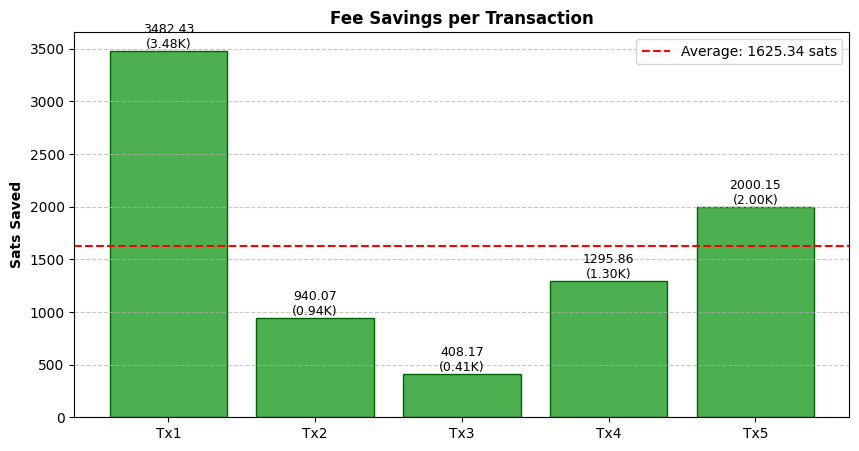

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
transactions = ["Tx1", "Tx2", "Tx3", "Tx4", "Tx5"]
savings_sats = [3482.43, 940.07, 408.17, 1295.86, 2000.15]
avg_savings = np.mean(savings_sats)

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(transactions, savings_sats, color='#4CAF50', edgecolor='darkgreen')
plt.axhline(avg_savings, color='red', linestyle='--', label=f'Average: {avg_savings:.2f} sats')

# Annotate values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}\n({height/1000:.2f}K)',
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Sats Saved', fontweight='bold')
plt.title('Fee Savings per Transaction', fontweight='bold')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
